In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

# classification example with iris data


In [3]:
iris = load_iris()
type(iris) # iris is a Bunch (like a dictionary)

sklearn.utils._bunch.Bunch

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(iris.data[:10,]) # first 10 rows: we have 4 columns of variables

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [6]:
print(iris.feature_names)  # The predictor variables (features) are four numeric variables

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
iris.target # the target is a categorical variable with three levels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
print(iris.target_names) # the observations are one of the following three species

['setosa' 'versicolor' 'virginica']


In [9]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size = 0.2, random_state = 1, 
                                                    stratify = iris.target)
# we stratify on iris.target to make sure that the training and test sets have the correct 

In [11]:
X_train.shape

(120, 4)

In [12]:
print(np.bincount(y_test))

[10 10 10]


# we will fit a k nearest neighbors classifier

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
dat = pd.DataFrame(X_train)
dat['species'] = pd.DataFrame(y_train)
dat.head()

,0,1,2,3,species
0,5.1,3.7,1.5,0.4,0
1,4.6,3.2,1.4,0.2,0
2,6.9,3.1,5.1,2.3,2
3,5.5,2.6,4.4,1.2,1
4,5.6,2.9,3.6,1.3,1


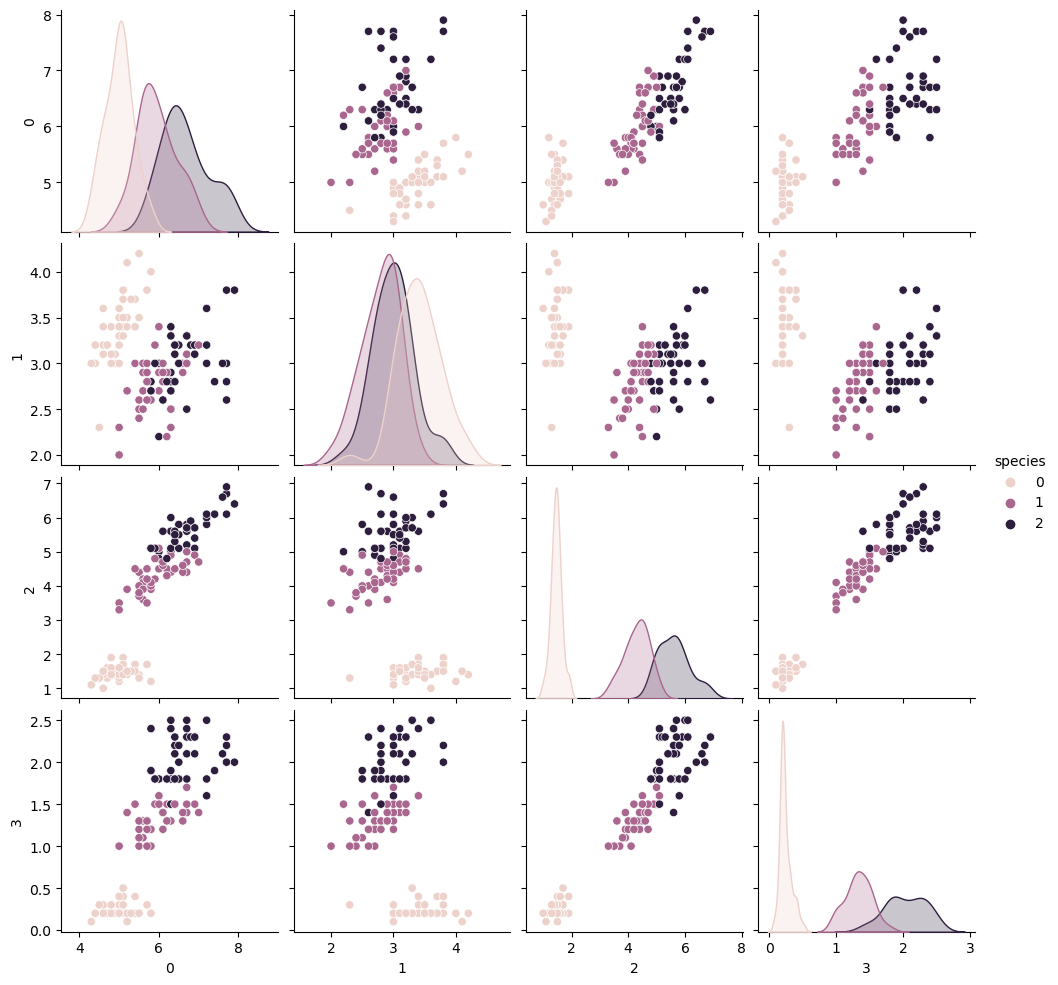

In [15]:
print(sns.pairplot(dat, hue = 'species'))

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [17]:
print(knn)

KNeighborsClassifier()


In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
print(knn.predict(X_test))  # our predictions based on the fitted model

[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 1 0 0 1 1]


In [20]:
print(y_test)  # the actual values

[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 2 0 0 1 1]


In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, knn.predict(X_test))
# true answer is in rows, and the prediction is in the column
# we see that when the true answer is 2, the predition was 1 one time.
# no errors would be a diagonal matrix

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]], dtype=int64)

In [22]:
# here we try a different knn model using only one nearest neighbor
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
confusion_matrix(y_test, knn1.predict(X_test))
# same performance

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]], dtype=int64)

In [23]:
# another knn model using 25 nearest neighbors
knn25 = KNeighborsClassifier(n_neighbors=25)
knn25.fit(X_train, y_train)
confusion_matrix(y_test, knn25.predict(X_test))
# slighlty worse performance with 25 nearest neighbors
# we have 2 errors. The true value is 2 and we predicted 1 twice.

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  8]], dtype=int64)

# Automated parameter search using GridSearchCV

What if I want to test out a bunch of different nearest neighbor values.

So we can try a knn with 1 nearest neighbor

a knn with 2 neighbors

knn with 3 neighbors, etc.

Rather than manually fitting 50 different models, we can have python automatically fit 50 models for us using GridSearchCV.

GridSearchCV will try a bunch of different models (you can vary more than one parameter), and will report back the model score.

Keep in mind that the more parameters you try out, the longer it will take to test and fit all of the models.

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1,50), 'weights': ['uniform','distance']}  # we make a dictionary called param_grid
# and the keyword will be the argument that goes into the model

knn = KNeighborsClassifier()  # note we do not specify n_neighbors here
knn_cv = GridSearchCV(knn, param_grid, cv = 5)  # we call GridSearchCV, we pass it the name of our model 'knn', and 
# also we give it the parameters it will search through
# cv=5 means we score it based on 5-fold cross validation

# we are not using the test data at all
# we are only using the training data

In [25]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [26]:
knn_cv.best_params_  # which set of parameters produced the best performing model?

{'n_neighbors': 13, 'weights': 'uniform'}

In [27]:
knn_cv.best_score_   # uses an accuracy score, which may not be the best metric

0.9833333333333334

In [28]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print(confusion_matrix(y_train, knn.predict(X_train)))

[[40  0  0]
 [ 0 38  2]
 [ 0  0 40]]


In [29]:
118/120

0.9833333333333333

In [30]:
print(confusion_matrix(y_test, knn.predict(X_test)))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


In [31]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=13)
cv_scores = cross_val_score(knn, X_train, y_train, cv = 5)
print(cv_scores)
print(np.mean(cv_scores))

[0.95833333 1.         1.         1.         0.95833333]
0.9833333333333334


## Gaussian Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
nbclass = GaussianNB()

In [33]:
nbclass.fit(X_train, y_train)

GaussianNB()

In [34]:
nbclass.predict(X_test)

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1])

In [35]:
print(confusion_matrix(y_test, nbclass.predict(X_test)))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


In [36]:
cross_val_score(nbclass, X_train, y_train, cv = 5)

array([0.91666667, 0.95833333, 0.95833333, 0.95833333, 0.95833333])

In [37]:
np.mean(cross_val_score(nbclass, X_train, y_train, cv = 5))

0.95